Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Importing Modules and Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA        #importing ARIMA 

In [0]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive/Rnn/energyforecast')

# Loading dataset from csv file

In [0]:
data=pd.read_csv('Power-Networks-LCL.csv')

# **Data Analysis** and Visualisation

In [6]:
data.head()

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0.0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0.0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0.0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0.0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0.0,ACORN-A,Affluent


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999971 entries, 0 to 999970
Data columns (total 6 columns):
LCLid            999971 non-null object
stdorToU         999971 non-null object
DateTime         999971 non-null object
KWh              999971 non-null float64
Acorn            999971 non-null object
Acorn_grouped    999971 non-null object
dtypes: float64(1), object(5)
memory usage: 45.8+ MB


In [8]:
data.describe()

,KWh
count,999971.000000
mean,0.239580
std,0.387533
min,0.000000
25%,0.060000
50%,0.129000
75%,0.255000
max,6.528000


In [9]:
LCLid_Count=data['LCLid'].value_counts()
LCLid_Count

MAC000018    39081
MAC000020    39078
MAC000021    39078
MAC000022    39071
MAC000033    39070
MAC000019    39070
MAC000034    39069
MAC000023    39068
MAC000032    39068
MAC000027    39068
MAC000030    39066
MAC000025    39064
MAC000026    39064
MAC000029    39063
MAC000024    39026
MAC000035    39023
MAC000006    36460
MAC000003    35468
MAC000028    32157
MAC000004    31676
MAC000013    29613
MAC000008    26012
MAC000009    25237
MAC000010    25048
MAC000007    25045
MAC000012    24669
MAC000002    24157
MAC000011    23704
MAC000016    19523
MAC000036    16175
Name: LCLid, dtype: int64

According to problem statement,we need to forecast energy usage of top 3 households based on their samples.So here we find 'MAC000018','MAC000020' and 'MAC000021' are top 3 households.

In [0]:
data_18=data[data['LCLid']=='MAC000018']
data_20=data[data['LCLid']=='MAC000020']
data_21=data[data['LCLid']=='MAC000021']

In [0]:
data_combined=pd.DataFrame()

In [0]:
data_combined=data_combined.append(data_18)
data_combined=data_combined.append(data_20)
data_combined=data_combined.append(data_21)

In [13]:
data_combined['LCLid'].value_counts()

MAC000018    39081
MAC000020    39078
MAC000021    39078
Name: LCLid, dtype: int64

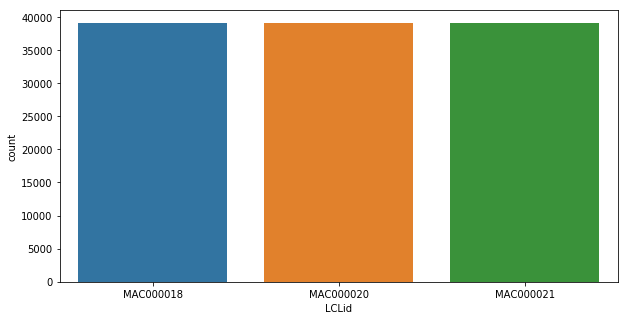

In [14]:
fig = plt.figure(figsize=(10,5))

sns.countplot(x='LCLid',data=data_combined)
plt.show()

In [15]:
data_combined['Acorn'].value_counts()

ACORN-E    78159
ACORN-J    39078
Name: Acorn, dtype: int64

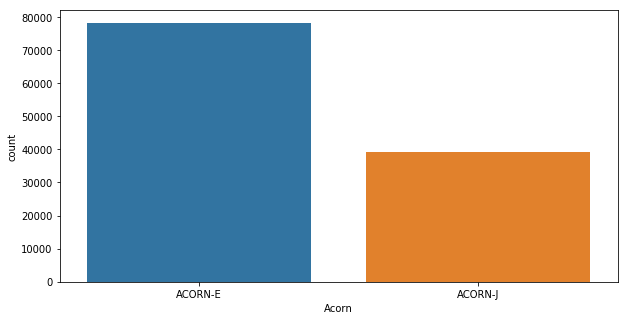

In [16]:
fig = plt.figure(figsize=(10,5))

sns.countplot(x='Acorn',data=data_combined)
plt.show()

In [17]:
data_combined['Acorn_grouped'].value_counts()

Affluent       78159
Comfortable    39078
Name: Acorn_grouped, dtype: int64

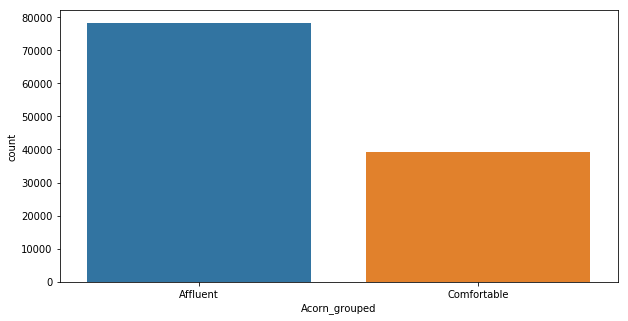

In [18]:
fig = plt.figure(figsize=(10,5))

sns.countplot(x='Acorn_grouped',data=data_combined)
plt.show()

# Data PreProcessing

In [19]:
data_combined.isnull().sum()

LCLid            0
stdorToU         0
DateTime         0
KWh              0
Acorn            0
Acorn_grouped    0
dtype: int64

In [20]:
data.isnull().sum()

LCLid            0
stdorToU         0
DateTime         0
KWh              0
Acorn            0
Acorn_grouped    0
dtype: int64

There is no null values in data.

In [0]:
data_18_processed=data_18[['KWh','DateTime']]
data_20_processed=data_20[['KWh','DateTime']]
data_21_processed=data_21[['KWh','DateTime']]

In [22]:
data_18_processed.head()

,KWh,DateTime
326612,0.303,2011-12-07 09:30:00.0000000
326613,0.200,2011-12-07 10:00:00.0000000
326614,0.218,2011-12-07 10:30:00.0000000
326615,0.209,2011-12-07 11:00:00.0000000
326616,0.210,2011-12-07 11:30:00.0000000


In [23]:
data_20_processed.head()

,KWh,DateTime
404763,0.275,2011-12-07 09:30:00.0000000
404764,0.231,2011-12-07 10:00:00.0000000
404765,0.204,2011-12-07 10:30:00.0000000
404766,0.194,2011-12-07 11:00:00.0000000
404767,0.317,2011-12-07 11:30:00.0000000


In [24]:
data_21_processed.head()

,KWh,DateTime
443841,0.491,2011-12-07 10:00:00.0000000
443842,0.346,2011-12-07 10:30:00.0000000
443843,0.473,2011-12-07 11:00:00.0000000
443844,0.456,2011-12-07 11:30:00.0000000
443845,0.432,2011-12-07 12:00:00.0000000


In [0]:
data_21_processed['DateTime'] = pd.to_datetime(data_21_processed['DateTime']) #to_datetime() method helps to convert string Date time into Python Date time object.
data_20_processed['DateTime'] = pd.to_datetime(data_20_processed['DateTime'])
data_18_processed['DateTime'] = pd.to_datetime(data_18_processed['DateTime'])

seperate DateTime column into date and time

In [0]:
data_18_processed['Time'],data_18_processed['Date']= data_18_processed['DateTime'].apply(lambda x:x.time()), data_18_processed['DateTime'].apply(lambda x:x.date())
data_20_processed['Time'],data_20_processed['Date']= data_20_processed['DateTime'].apply(lambda x:x.time()), data_20_processed['DateTime'].apply(lambda x:x.date())
data_21_processed['Time'],data_21_processed['Date']= data_21_processed['DateTime'].apply(lambda x:x.time()), data_21_processed['DateTime'].apply(lambda x:x.date())

making Date column as index

In [0]:
data_18_processed.set_index('Date',inplace=True)
data_20_processed.set_index('Date',inplace=True)
data_21_processed.set_index('Date',inplace=True)

Took only KWh column in data

In [0]:
data_18_processed=data_18_processed['KWh']
data_20_processed=data_20_processed['KWh']
data_21_processed=data_21_processed['KWh']

In [31]:
data_18_processed.head()

Date
2011-12-07    0.303
2011-12-07    0.200
2011-12-07    0.218
2011-12-07    0.209
2011-12-07    0.210
Name: KWh, dtype: float64

Visuaisation of data spreaded of household MAC000018.

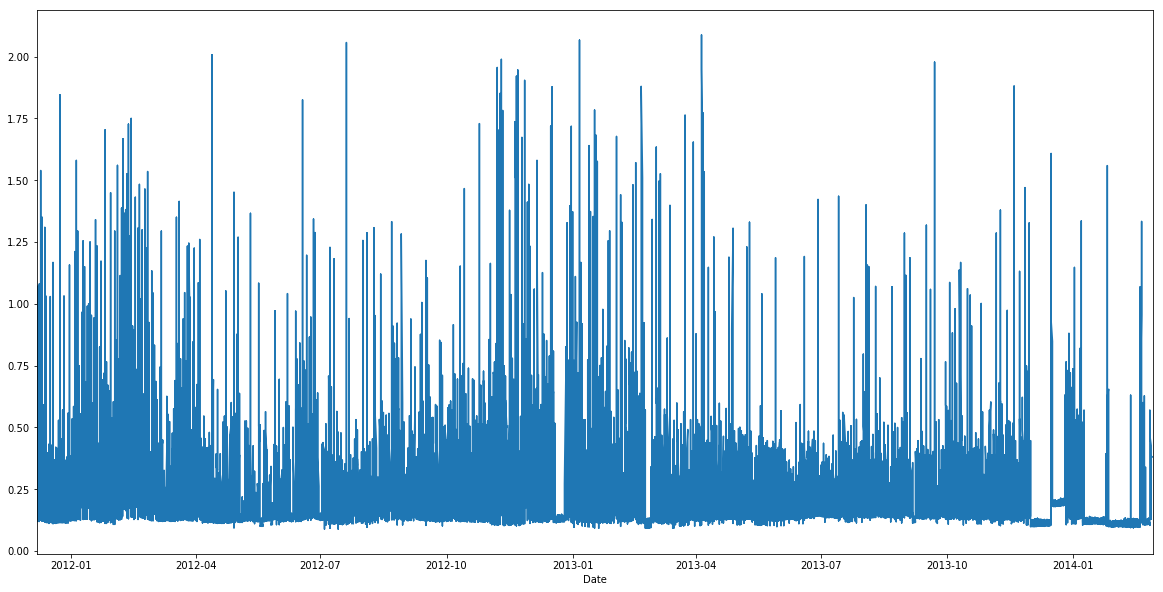

In [32]:
fig = plt.figure(figsize=(20,10))
data_18_processed.plot()
pyplot.show()

Visuaisation of data spreaded of household MAC000020.

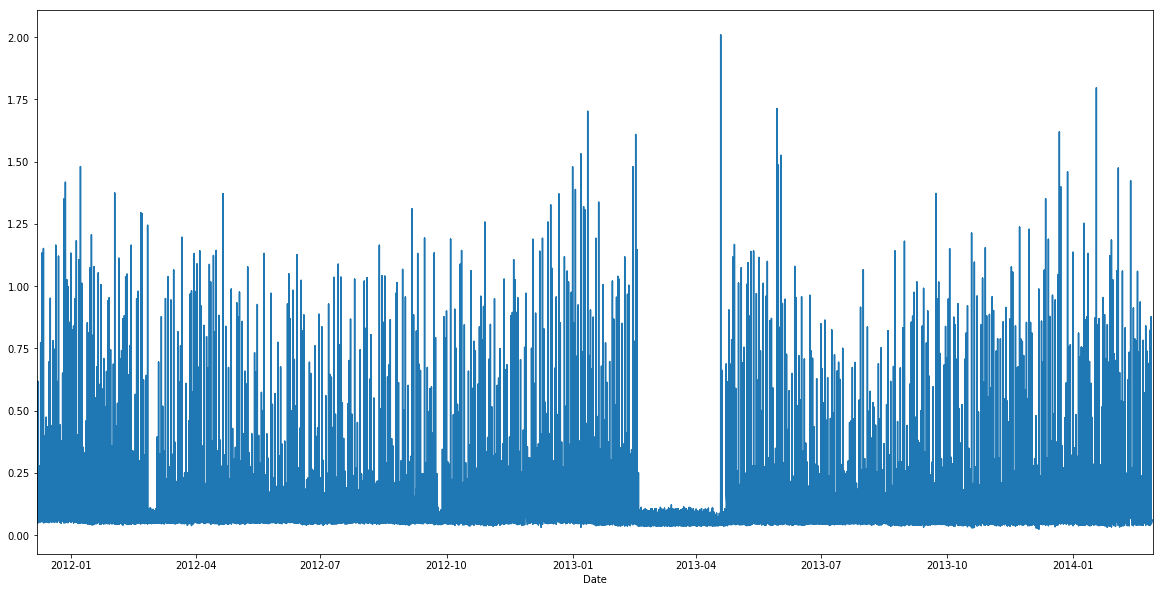

In [33]:
fig = plt.figure(figsize=(20,10))
data_20_processed.plot()
pyplot.show()

Visuaisation of data spreaded of household MAC000021.

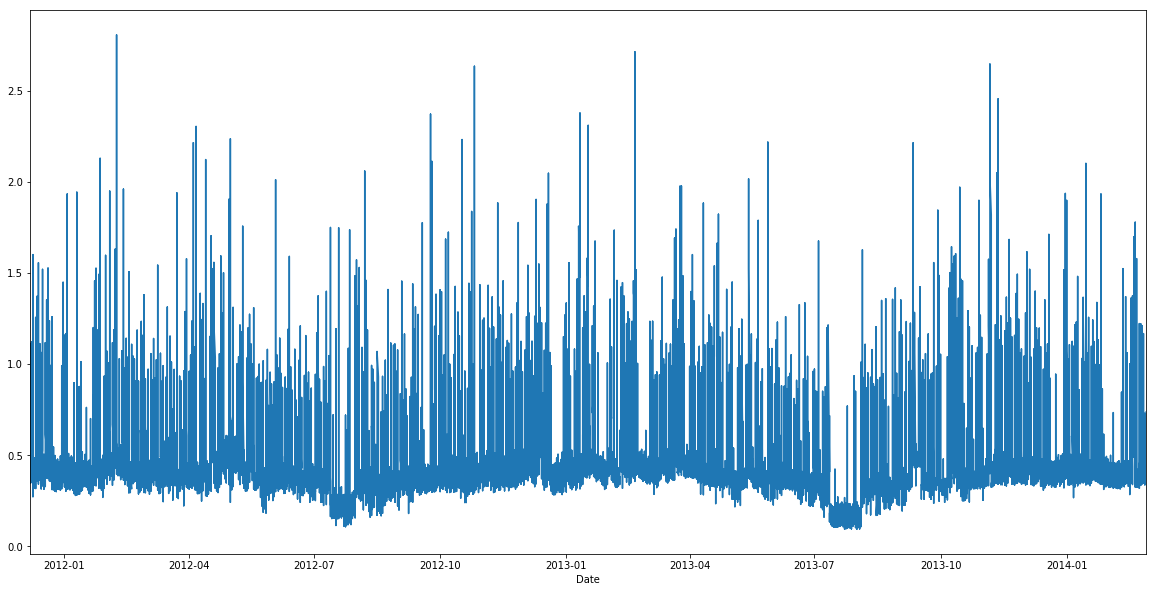

In [34]:
fig = plt.figure(figsize=(20,10))
data_21_processed.plot()
pyplot.show()

Autocorrelation for a large number of lags in the time series.

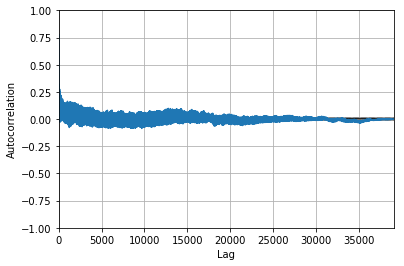

In [35]:
autocorrelation_plot(data_18_processed)
pyplot.show()

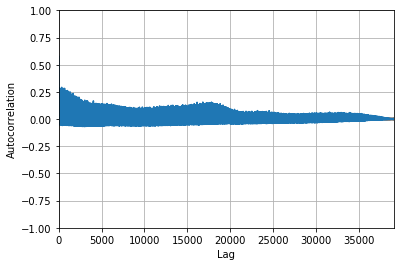

In [36]:
autocorrelation_plot(data_20_processed)
pyplot.show()

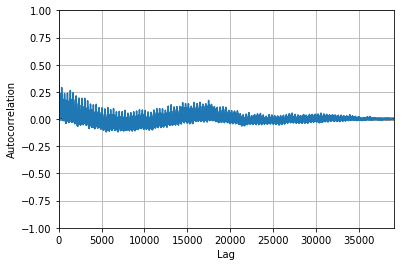

In [37]:
autocorrelation_plot(data_21_processed)
pyplot.show()

# Fitting of Model by Arima

In [38]:
# fit model 1 for household MAC000018.
model_18 = ARIMA(data_18_processed, order=(5,1,0))
model_fit_18 = model_18.fit(disp=0)
print(model_fit_18.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.KWh   No. Observations:                39080
Model:                 ARIMA(5, 1, 0)   Log Likelihood               30192.813
Method:                       css-mle   S.D. of innovations              0.112
Date:                Mon, 26 Aug 2019   AIC                         -60371.625
Time:                        06:51:41   BIC                         -60311.612
Sample:                             1   HQIC                        -60352.609
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.94e-06      0.000      0.009      0.993      -0.001       0.001
ar.L1.D.KWh    -0.1696      0.005    -33.604      0.000      -0.180      -0.160
ar.L2.D.KWh    -0.2454      0.005    -48.127    

In [39]:
# fit model 2 for household MAC000020.
model_20 = ARIMA(data_20_processed, order=(5,1,0))
model_fit_20 = model_20.fit(disp=0)
print(model_fit_20.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.KWh   No. Observations:                39077
Model:                 ARIMA(5, 1, 0)   Log Likelihood               27173.282
Method:                       css-mle   S.D. of innovations              0.121
Date:                Mon, 26 Aug 2019   AIC                         -54332.565
Time:                        06:51:49   BIC                         -54272.552
Sample:                             1   HQIC                        -54313.548
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.326e-06      0.000     -0.016      0.987      -0.001       0.001
ar.L1.D.KWh    -0.3920      0.005    -77.759      0.000      -0.402      -0.382
ar.L2.D.KWh    -0.3631      0.005    -67.729    

In [40]:
# fit model 3 for household MAC000018==21.
model_21 = ARIMA(data_21_processed, order=(5,1,0))
model_fit_21 = model_21.fit(disp=0)
print(model_fit_21.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.KWh   No. Observations:                39077
Model:                 ARIMA(5, 1, 0)   Log Likelihood               18582.135
Method:                       css-mle   S.D. of innovations              0.150
Date:                Mon, 26 Aug 2019   AIC                         -37150.269
Time:                        06:51:55   BIC                         -37090.256
Sample:                             1   HQIC                        -37131.253
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.801e-06      0.000      0.013      0.990      -0.001       0.001
ar.L1.D.KWh    -0.3326      0.005    -65.823      0.000      -0.343      -0.323
ar.L2.D.KWh    -0.1735      0.005    -32.688    

In [41]:
X = data_18_processed.values
X.shape

(39081,)

In [42]:
Y = data_20_processed.values
Y.shape

(39078,)

In [43]:
Z = data_21_processed.values
Z.shape

(39078,)

In [0]:
size_18=39030
size_20=39030
size_21=39030

# splitting the data into train and test for each household seperately.

In [0]:
train_18, test_18 = X[0:size_18], X[size_18:len(X)]
train_20, test_20 = Y[0:size_20], Y[size_20:len(Y)]
train_21, test_21 = Z[0:size_21], Z[size_21:len(Z)]

In [46]:
train_18.shape

(39030,)

In [47]:
test_18.shape

(51,)

In [48]:
train_20.shape


(39030,)

In [49]:
test_20.shape

(48,)

In [50]:
test_21.shape

(48,)

In [51]:
train_21.shape

(39030,)

In [0]:
history_18 = [x for x in train_18]
history_20 = [x for x in train_20]
history_21 = [x for x in train_21]

In [0]:
predictions_18 = list()
predictions_20 = list()
predictions_21 = list()


# Making **Predictions**

In [0]:
#predictions for household MAC000018.
for t in range(len(test_18)):
	model_18 = ARIMA(history_18, order=(5,1,0))
	model_fit_18 = model_18.fit(disp=0)
	output_18 = model_fit_18.forecast()
	yhat_18 = output_18[0]
	predictions_18.append(yhat_18)
	obs_18 = test_18[t]
	history_18.append(obs_18)

In [0]:
#predictions for household MAC000020.
for t in range(len(test_20)):
	model_20 = ARIMA(history_20, order=(5,1,0))
	model_fit_20 = model_20.fit(disp=0)
	output_20 = model_fit_20.forecast()
	yhat_20 = output_20[0]
	predictions_20.append(yhat_20)
	obs_20 = test_20[t]
	history_20.append(obs_20)

In [0]:
#predictions for household MAC000021.
for t in range(len(test_21)):
	model_21 = ARIMA(history_21, order=(5,1,0))
	model_fit_21 = model_21.fit(disp=0)
	output_21 = model_fit_21.forecast()
	yhat_21 = output_21[0]
	predictions_21.append(yhat_21)
	obs_21 = test_21[t]
	history_21.append(obs_21)
	

# Visualise and Compare actual values and predicted values.

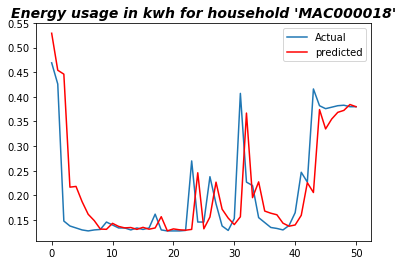

In [0]:
# plot1 for household MAC000018.
pyplot.plot(test_18,label='Actual')
pyplot.plot(predictions_18, color='red',label='predicted')
plt.legend()
plt.title("Energy usage in kwh for household 'MAC000018'", fontsize=14, fontstyle='italic', fontweight='bold')
pyplot.show()

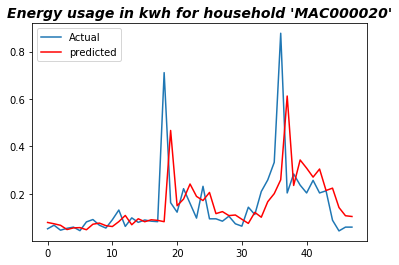

In [0]:
# plot2 for household MAC000020.
pyplot.plot(test_20,label='Actual')
pyplot.plot(predictions_20, color='red',label='predicted')
plt.legend()
plt.title("Energy usage in kwh for household 'MAC000020'", fontsize=14, fontstyle='italic', fontweight='bold')
pyplot.show()

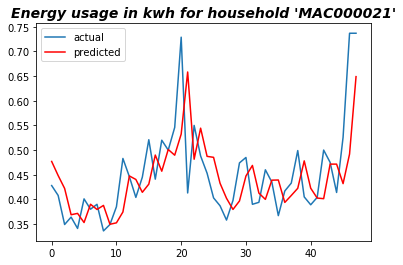

In [0]:
# plot3 for household MAC000021.
pyplot.plot(test_21,label='actual')
pyplot.plot(predictions_21, color='red',label='predicted')
plt.legend()
plt.title("Energy usage in kwh for household 'MAC000021'", fontsize=14, fontstyle='italic', fontweight='bold')
pyplot.show()

# Checking of models performance by different ways

In [0]:
def report(a,b):
  #give a,b as arguements  in form of  i.e (test_18,predictions_18).
  mse = mean_squared_error(a, b)
  rmse = sqrt(mse)
  mae = mean_absolute_error(a,b)
  a=print("mean square error:",mse)
  b=print("square root mean square error:",rmse)
  c=print("mean absolute error:",mae)
  
  return a,b,c

In [0]:
report(test_18,predictions_18)    #calling of function for household MAC000018.

mean square error: 0.005855923940638889
square root mean square error: 0.0765240089164106
mean absolute error: 0.04341732635742607


(None, None, None)

In [0]:
report(test_20,predictions_20)      #calling of function for household MAC000020.

mean square error: 0.024837793832365767
square root mean square error: 0.15760010733614926
mean absolute error: 0.08224576602273227


(None, None, None)

In [0]:
report(test_21,predictions_21)         #calling of function for household MAC000021.

mean square error: 0.006111664251133654
square root mean square error: 0.07817713381247521
mean absolute error: 0.057249801186927435


(None, None, None)

In [0]:
predictions1_18=[]
for i in range(len(predictions_18)):
  predictions1_18.append(predictions_18[i][0])
predictions1_20=[]
for i in range(len(predictions_20)):
  predictions1_20.append(predictions_20[i][0])
predictions1_21=[]
for i in range(len(predictions_21)):
  predictions1_21.append(predictions_21[i][0])

# Making DataFrame of actual and predicted values for camparision

In [0]:
df_18=pd.DataFrame()
df_18=pd.DataFrame({'Actual_18':test_18, 'Predicted_18':predictions1_18})  

df_20=pd.DataFrame()
df_20=pd.DataFrame({'Actual_20':test_20, 'Predicted_20':predictions1_20})  

df_21=pd.DataFrame()
df_21=pd.DataFrame({'Actual_21':test_21, 'Predicted_21':predictions1_21})  


In [0]:
df_combined=pd.concat([df_18, df_20], axis=1)

df_combined=pd.concat([df_combined, df_21], axis=1)
df_combined.head()

,Actual_18,Predicted_18,Actual_20,Predicted_20,Actual_21,Predicted_21
0,0.469,0.529028,0.053,0.079660,0.428,0.476922
1,0.426,0.453963,0.068,0.074048,0.408,0.448331
2,0.148,0.446057,0.047,0.067700,0.349,0.422178
3,0.138,0.216796,0.055,0.049758,0.364,0.368812
4,0.134,0.218260,0.060,0.056819,0.341,0.371564
